In [1]:
from xnn import xnn 
from aux_functions import keel_dat_reader
from aux_functions import split
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches


# Exploração dos dados 
Esse notebook tem o intuito de explorar mais os conjuntos de dados , pricipalmente  determinando um número adequado k de vizinhos e mostrando graficamente os resultados

Determinando melhor número de vizinhos entre 5 e 30

In [2]:


def plot_graphs(path_to_file,separator,labels,relevant,title):
    points = keel_dat_reader(path_to_file,separator)
    train,test = split(points,0.7)
    tree=xnn(train)
    k=[5,10,15,20,25,30]
    prec=[]
    rec =[]
    acc =[]
    for i in k:
        tree.knn_classifier(test,labels,i)
        stats=tree.get_stats(relevant)
        prec.append(stats[0])
        rec.append(stats[1])
        acc.append(stats[2])

    plt.plot(k,prec,'bs',k,rec,'r^',k,acc,'go')
    plt.axis([4, 31, 0, 1.1])

    precision = mpatches.Patch(color='red', label='precision')
    recall = mpatches.Patch(color='blue', label='recall')
    accuracy = mpatches.Patch(color='green', label='accuracy')
    plt.legend(handles=[precision,recall,accuracy])
    plt.ylabel("score")
    plt.xlabel("Number of neighbors")
    plt.title(title)
    plt.savefig('./figures/stats/'+title+"_stats")
    plt.show()
   

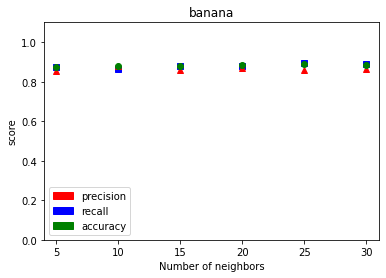

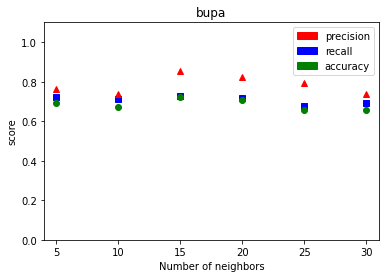

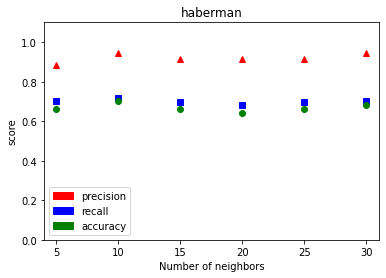

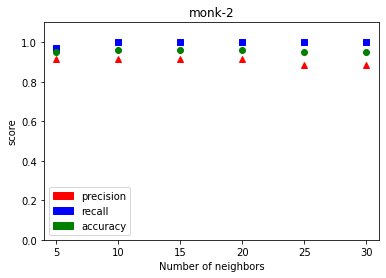

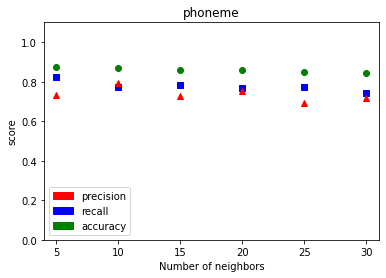

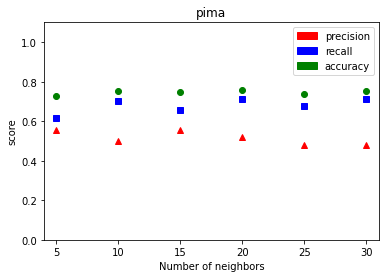

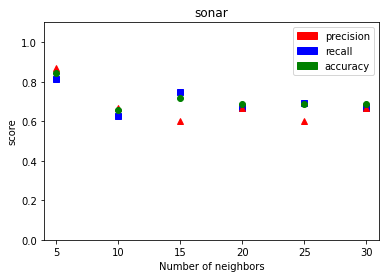

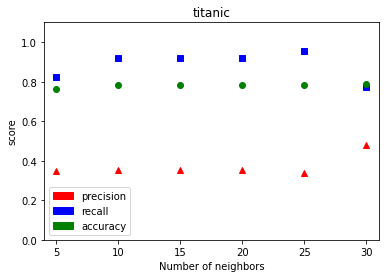

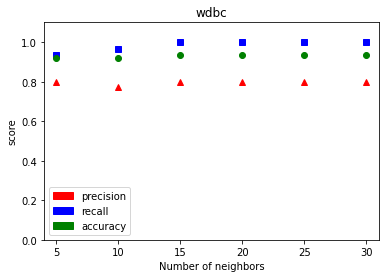

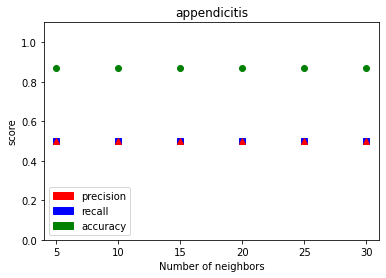

In [3]:
plot_graphs('./datasets/banana.dat',",",["-1.0","1.0"],"1.0","banana")
plot_graphs('./datasets/bupa.dat',", ",["2","1"],"2","bupa")
plot_graphs('./datasets/haberman.dat',", ",["positive","negative"],"negative","haberman")
plot_graphs('./datasets/monk-2.dat',", ",["1","0"],"1","monk-2")
plot_graphs('./datasets/phoneme.dat',",",["0","1"],"1","phoneme")
plot_graphs('./datasets/pima.dat',",",["tested_positive","tested_negative"],"tested_positive","pima")
plot_graphs('./datasets/sonar.dat',", ",["M", "R"],"R","sonar")
plot_graphs('./datasets/titanic.dat',",",["-1.0","1.0"],"1.0","titanic")
plot_graphs('./datasets/wdbc.dat',",",["M","B"],"M","wdbc")
plot_graphs('./datasets/appendicitis.dat',",",["0","1"],"1","appendicitis")